<a href="https://colab.research.google.com/github/wassimsalam01/covid19-forecasting/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [94]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [95]:
load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Reading COVID-19 Database

In [96]:
url = 'https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv'
df = pd.read_csv(url)

In [97]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_iso8601  1061 non-null   object
 1   DE-BB         1061 non-null   int64 
 2   DE-BE         1061 non-null   int64 
 3   DE-BW         1061 non-null   int64 
 4   DE-BY         1061 non-null   int64 
 5   DE-HB         1061 non-null   int64 
 6   DE-HE         1061 non-null   int64 
 7   DE-HH         1061 non-null   int64 
 8   DE-MV         1061 non-null   int64 
 9   DE-NI         1061 non-null   int64 
 10  DE-NW         1061 non-null   int64 
 11  DE-RP         1061 non-null   int64 
 12  DE-SH         1061 non-null   int64 
 13  DE-SL         1061 non-null   int64 
 14  DE-SN         1061 non-null   int64 
 15  DE-ST         1061 non-null   int64 
 16  DE-TH         1061 non-null   int64 
 17  sum_cases     1061 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 149.3+ KB


,time_iso8601,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_cases
0,2020-03-02T17:00:00+0000,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0,209
1,2020-03-03T17:00:00+0000,2,6,54,40,4,13,5,2,10,145,3,5,3,1,0,1,294
2,2020-03-04T17:00:00+0000,2,9,92,50,4,15,6,4,14,235,7,5,3,1,0,1,448
3,2020-03-05T17:00:00+0000,4,19,128,69,4,21,11,5,20,332,8,6,3,1,0,1,632
4,2020-03-06T17:00:00+0000,4,24,179,120,4,22,14,5,27,394,10,8,3,3,0,1,818


# Exploring Dataset using Prophet

In [98]:
# Create new dataframe for the state of Berlin
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
# Rename columns
berlin_df.columns = ['ds', 'y']
berlin_df.head()

,ds,y
0,2020-03-02T17:00:00+0000,0
1,2020-03-03T17:00:00+0000,6
2,2020-03-04T17:00:00+0000,9
3,2020-03-05T17:00:00+0000,19
4,2020-03-06T17:00:00+0000,24


In [99]:
# Drop timestamp & keep only date stamp
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [100]:
berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,9
3,2020-03-05,19
4,2020-03-06,24


In [101]:
# Initialize Prophet model
m = Prophet()
m.fit(berlin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/26idur52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/wlzfm9i5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84647', 'data', 'file=/tmp/tmpx_ssywrg/26idur52.json', 'init=/tmp/tmpx_ssywrg/wlzfm9i5.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modeli85hxsff/prophet_model-20240722102814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [102]:
# Create new dataframe with 20 more entries / date stamps
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
1076,2023-02-11
1077,2023-02-12
1078,2023-02-13
1079,2023-02-14
1080,2023-02-15


In [103]:
# Predict number of cases "yhat" for those 20 days, with lower and upper bounds
# "yhat_lower" and "yhat_upper"
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1076,2023-02-11,1.434375e+06,1.429191e+06,1.440048e+06
1077,2023-02-12,1.434174e+06,1.428613e+06,1.440370e+06
1078,2023-02-13,1.435598e+06,1.429970e+06,1.442546e+06
1079,2023-02-14,1.437070e+06,1.431417e+06,1.444632e+06
1080,2023-02-15,1.438435e+06,1.432035e+06,1.445731e+06


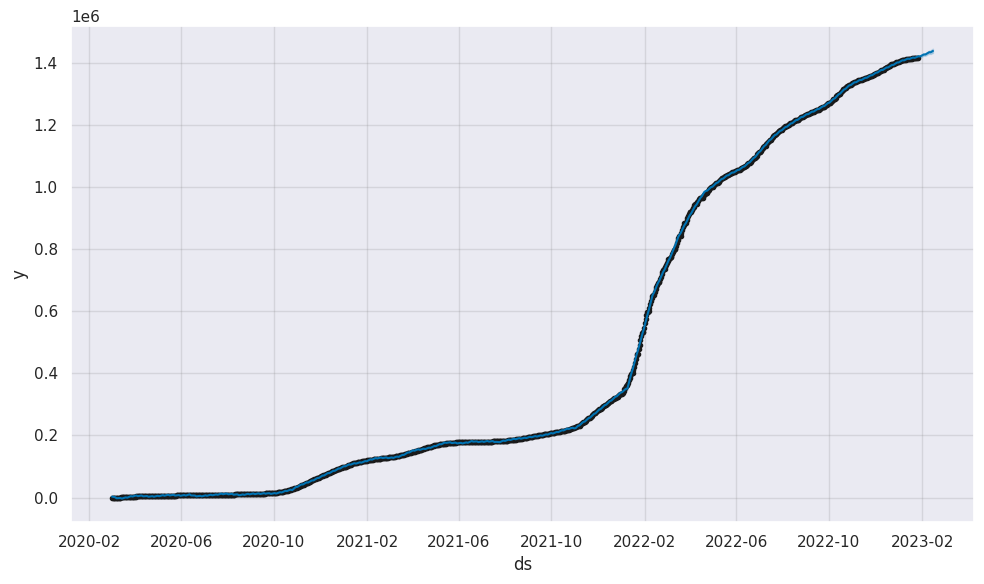

In [104]:
fig1 = m.plot(forecast)

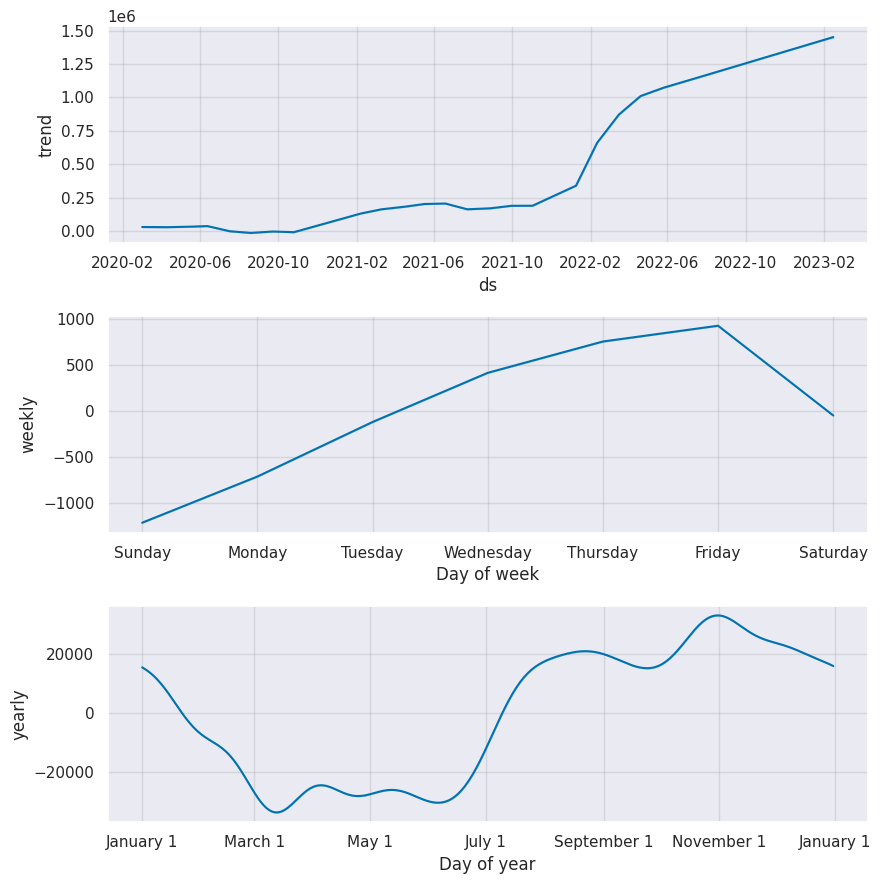

In [105]:
fig2 = m.plot_components(forecast)

In [106]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [107]:
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/xo5igi6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/aik6ip3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2647', 'data', 'file=/tmp/tmpx_ssywrg/xo5igi6r.json', 'init=/tmp/tmpx_ssywrg/aik6ip3v.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelq_5bv151/prophet_model-20240722102819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


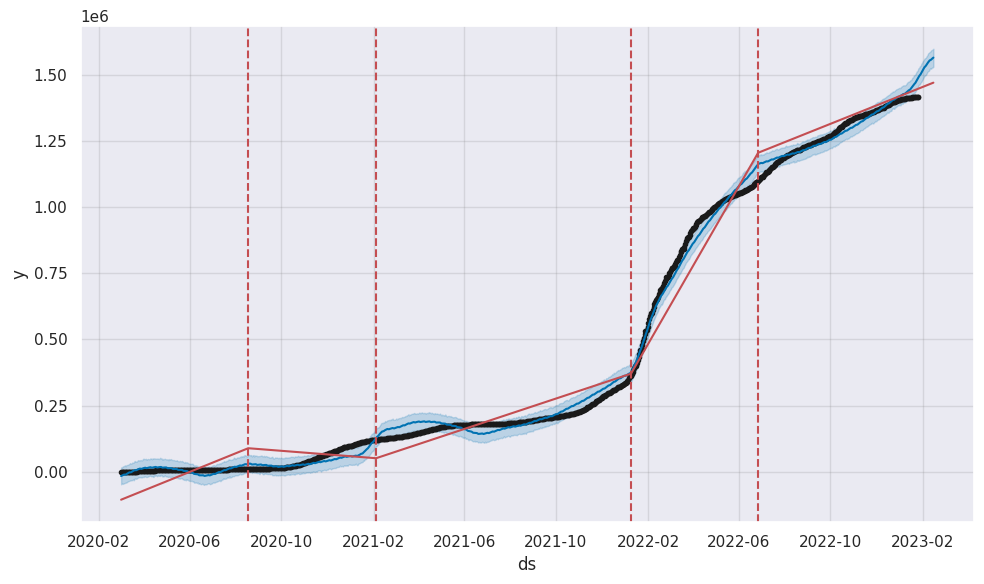

In [108]:
# Exploring changepoints, i.e. days where case number increase drastically
from prophet.plot import add_changepoints_to_plot

future2 = m.make_future_dataframe(periods=20)
m  = Prophet(n_changepoints=5)
forecast = m.fit(berlin_df).predict(future2)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [109]:
# Display changepoints
m.changepoints

169   2020-08-18
339   2021-02-04
508   2021-07-23
678   2022-01-09
847   2022-06-27
Name: ds, dtype: datetime64[ns]

# Obtaining and Plotting Daily New Cases (Berlin + Germany)

In [110]:
new_df = df[['time_iso8601','DE-BE', 'sum_cases']].copy(deep=True)
new_df['time_iso8601'] = new_df['time_iso8601'].str[:10]
new_df.columns = ['time', 'Berlin', 'Germany']
new_df.head()

,time,Berlin,Germany
0,2020-03-02,0,209
1,2020-03-03,6,294
2,2020-03-04,9,448
3,2020-03-05,19,632
4,2020-03-06,24,818


In [111]:
# Switching from cumulative number of cases to daily new cases
for i in range(len(new_df)-1, 0, -1):
   new_df.loc[i,"Berlin"] = (new_df.loc[i,"Berlin"] - new_df.loc[i - 1,"Berlin"])
   new_df.loc[i,"Germany"] = (new_df.loc[i,"Germany"] - new_df.loc[i - 1,"Germany"])
new_df.head()

,time,Berlin,Germany
0,2020-03-02,0,209
1,2020-03-03,6,85
2,2020-03-04,3,154
3,2020-03-05,10,184
4,2020-03-06,5,186


<ipython-input-112-41dc09743fa1>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



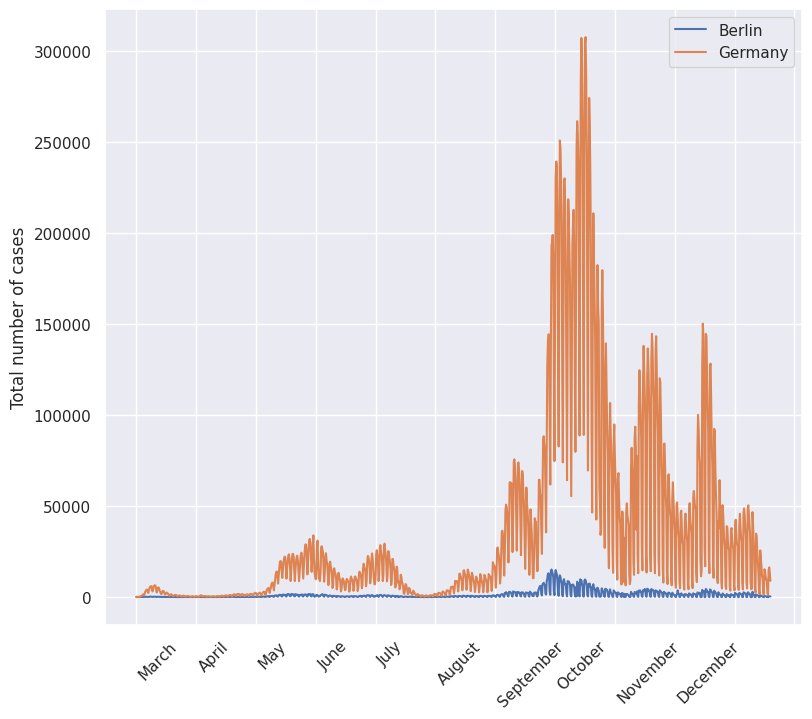

In [112]:
import seaborn as sns
import matplotlib.ticker as ticker

df_melted = new_df.melt("time",var_name="locality",value_name="Daily cases")

sns.set(rc={'figure.figsize':(9,8)})
ax = sns.lineplot(data=df_melted, x="time", y = "Daily cases", hue = "locality")
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
x_dates = ["", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_dates, rotation=45, ha='left')
ax.set(xlabel="")
ax.set(ylabel="Total number of cases")
legend = ax.legend()

# Prophet Analysis on Daily New Cases Data (Berlin only)

In [113]:
# Same as before
# Switch from cumulative number of cases to daily new cases, and only Berlin
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
for i in range(len(berlin_df)-1, 0, -1):
   berlin_df.loc[i,'DE-BE'] = (berlin_df.loc[i,'DE-BE'] - berlin_df.loc[i - 1,'DE-BE'])
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,3
3,2020-03-05,10
4,2020-03-06,5


In [114]:
m = Prophet()
m.fit(berlin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/7tkjyi4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/68zc7f0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84214', 'data', 'file=/tmp/tmpx_ssywrg/7tkjyi4l.json', 'init=/tmp/tmpx_ssywrg/68zc7f0i.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelbn7snn_2/prophet_model-20240722102824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [115]:
# Make predictions for next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1086,2023-02-21,1046.013869,-764.875376,2863.207033
1087,2023-02-22,897.720117,-881.216110,2717.505353
1088,2023-02-23,583.241971,-1183.127979,2339.355583
1089,2023-02-24,304.195455,-1497.124394,1977.229264
1090,2023-02-25,-913.381070,-2657.689746,849.417575


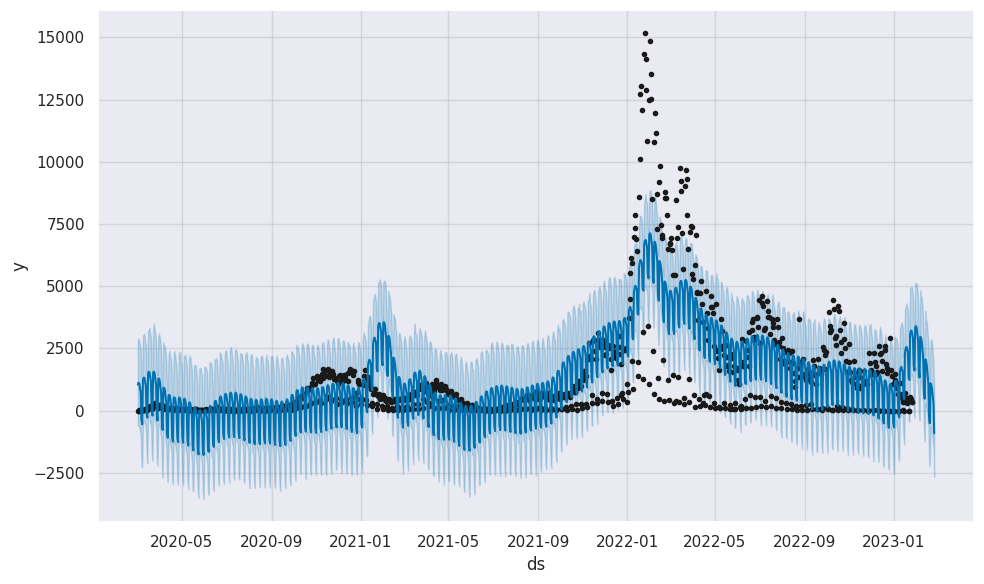

In [116]:
fig1 = m.plot(forecast)

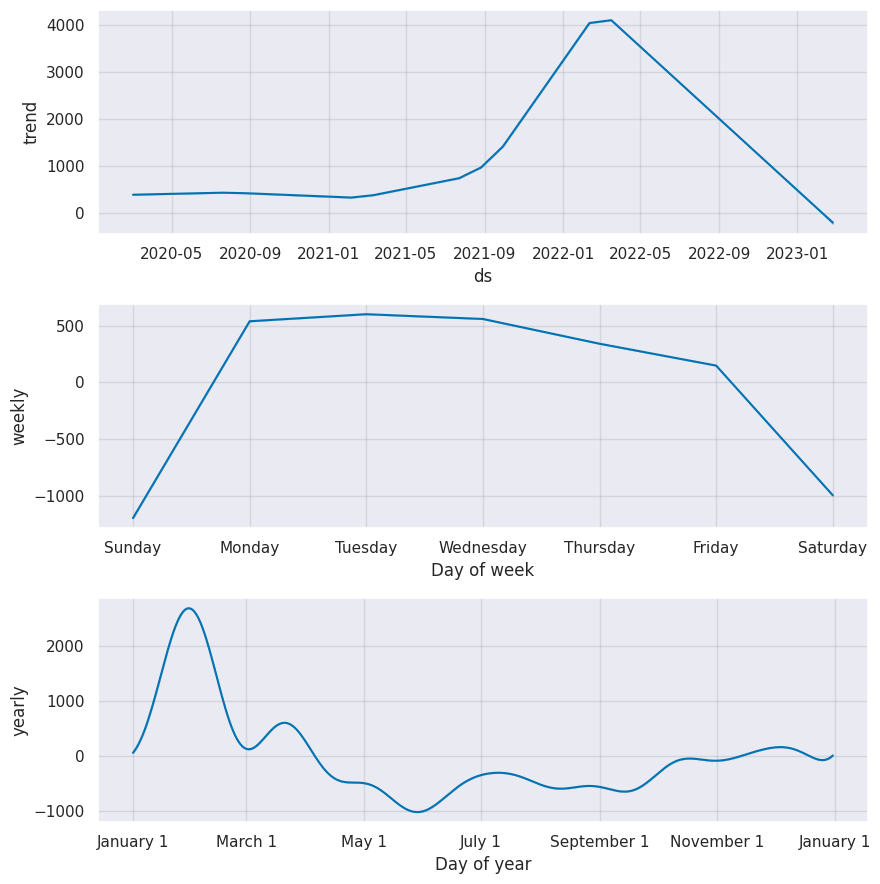

In [117]:
fig2 = m.plot_components(forecast)

In [118]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# No Change-Point Found (Daily New Cases Data) (Berlin only)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/ruqjf84p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/7xhntl42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81694', 'data', 'file=/tmp/tmpx_ssywrg/ruqjf84p.json', 'init=/tmp/tmpx_ssywrg/7xhntl42.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modely8sq9g1_/prophet_model-20240722102827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


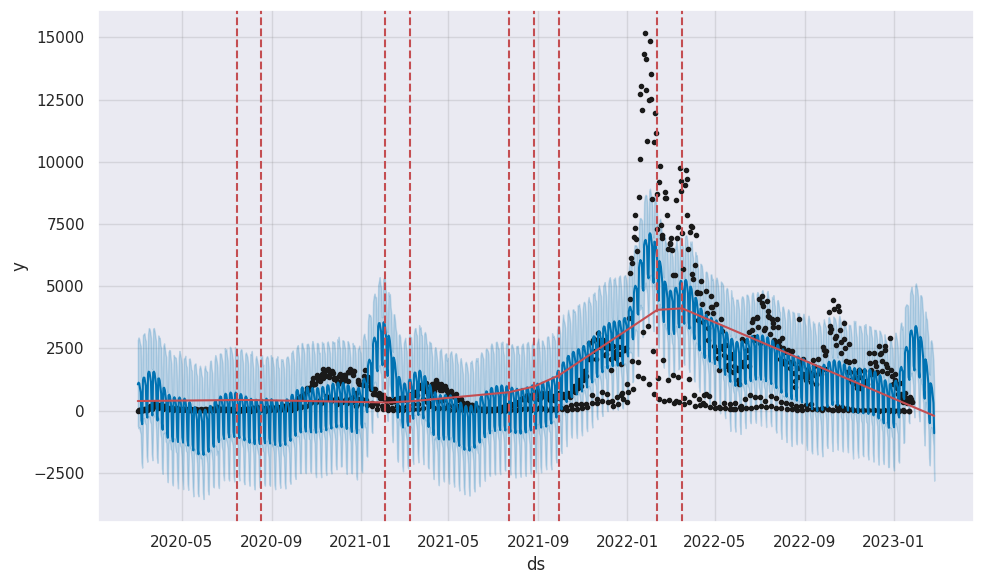

In [119]:
from prophet.plot import add_changepoints_to_plot

m = Prophet(yearly_seasonality=True)
forecast = m.fit(berlin_df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [120]:
berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,3
3,2020-03-05,10
4,2020-03-06,5


# Train & Test (last 2 weeks) for Prophet - Cumulative Data (Berlin only)

In [121]:
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
berlin_df.columns = ['ds', 'y']
berlin_df.tail()

,ds,y
1056,2023-01-22T17:00:00+0000,1414687
1057,2023-01-23T17:00:00+0000,1415249
1058,2023-01-24T17:00:00+0000,1415717
1059,2023-01-25T17:00:00+0000,1416079
1060,2023-01-26T17:00:00+0000,1416412


In [122]:
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [123]:
df_train = berlin_df[['ds', 'y']].iloc[:-14]

In [124]:
df_train.tail()

,ds,y
1042,2023-01-08,1409098
1043,2023-01-09,1410202
1044,2023-01-10,1410777
1045,2023-01-11,1411451
1046,2023-01-12,1411943


In [125]:
future = berlin_df[['ds']].iloc[-14:]

In [126]:
future

,ds
1047,2023-01-13
1048,2023-01-14
1049,2023-01-15
1050,2023-01-16
1051,2023-01-17
1052,2023-01-18
1053,2023-01-19
1054,2023-01-20
1055,2023-01-21
1056,2023-01-22


In [127]:
m = Prophet(yearly_seasonality=True)
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/posnircf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/jtgg19xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93836', 'data', 'file=/tmp/tmpx_ssywrg/posnircf.json', 'init=/tmp/tmpx_ssywrg/jtgg19xk.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelykmpqp6u/prophet_model-20240722102828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [128]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2023-01-22,1.435655e+06,1.429753e+06,1.441384e+06
10,2023-01-23,1.439310e+06,1.433502e+06,1.444937e+06
11,2023-01-24,1.443174e+06,1.437195e+06,1.449350e+06
12,2023-01-25,1.447148e+06,1.441022e+06,1.453081e+06
13,2023-01-26,1.451038e+06,1.444547e+06,1.457326e+06


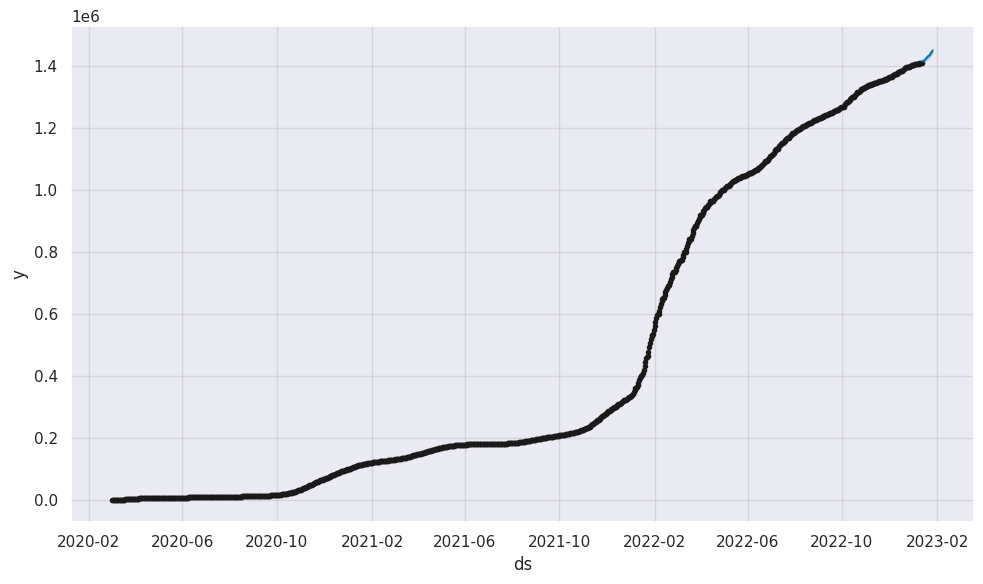

In [129]:
fig1 = m.plot(forecast)

In [130]:
testing_labels =  berlin_df[['y']][-14:].values

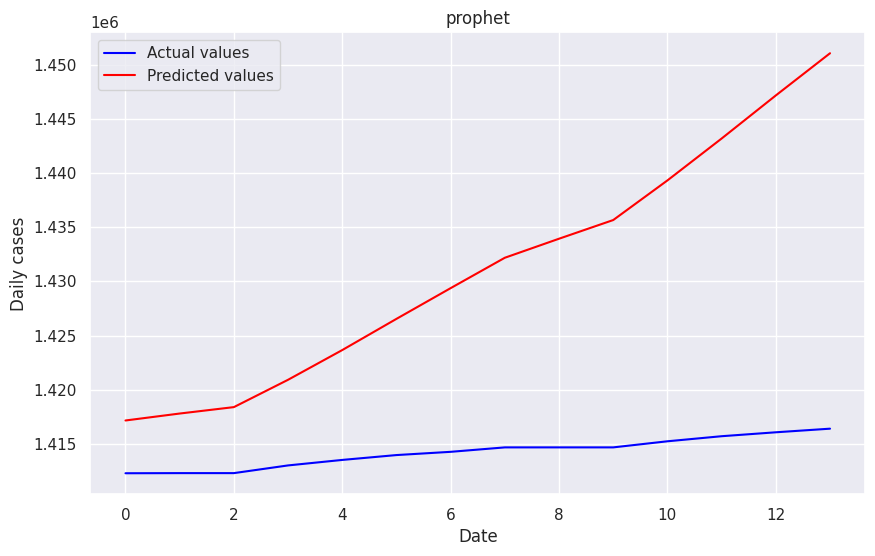

In [131]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(forecast['yhat'], color='red', label='Predicted values')
plt.title('prophet')
plt.xlabel('Date')
plt.ylabel('Daily cases')
plt.legend()
plt.show()

# Train & Test (last 2 weeks) for Prophet - Daily New Cases Data (Berlin only)



In [132]:
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
for i in range(len(berlin_df)-1, 0, -1):
   berlin_df.loc[i,'DE-BE'] = (berlin_df.loc[i,'DE-BE'] - berlin_df.loc[i - 1,'DE-BE'])
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [133]:
df_train = berlin_df[['ds', 'y']].iloc[:-14]

In [134]:
future = berlin_df[['ds']].iloc[-14:]

In [135]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/p58n_2hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/8n8y_c_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76984', 'data', 'file=/tmp/tmpx_ssywrg/p58n_2hd.json', 'init=/tmp/tmpx_ssywrg/8n8y_c_1.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelynzb09g5/prophet_model-20240722102831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [136]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2023-01-22,2623.693340,891.726372,4303.056511
10,2023-01-23,4466.926308,2723.560576,6342.662673
11,2023-01-24,4612.803154,2943.183638,6243.971558
12,2023-01-25,4634.738095,2920.947662,6400.250126
13,2023-01-26,4460.486413,2805.027986,6331.868670


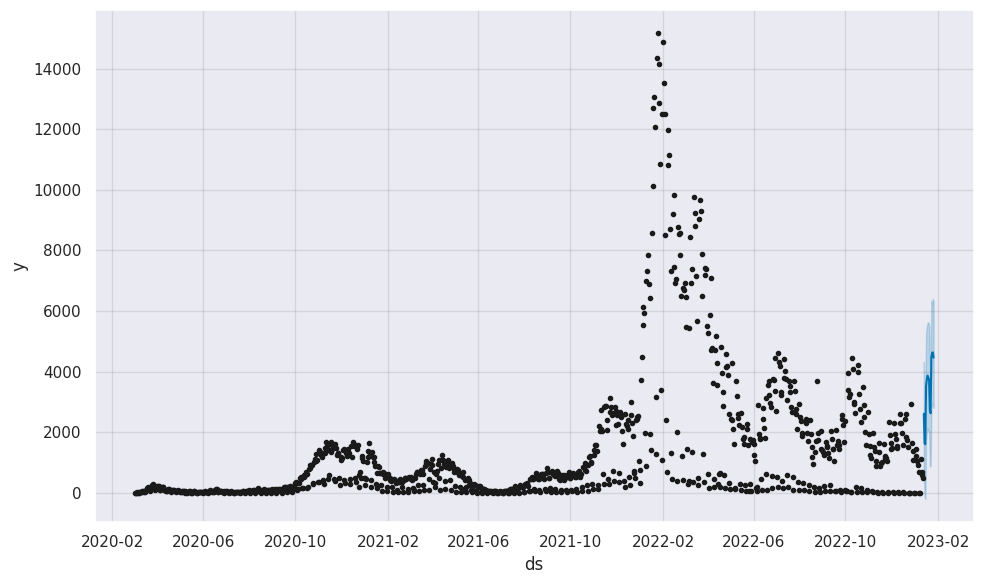

In [137]:
fig1 = m.plot(forecast)

In [138]:
testing_labels =  berlin_df[['y']][-14:].values

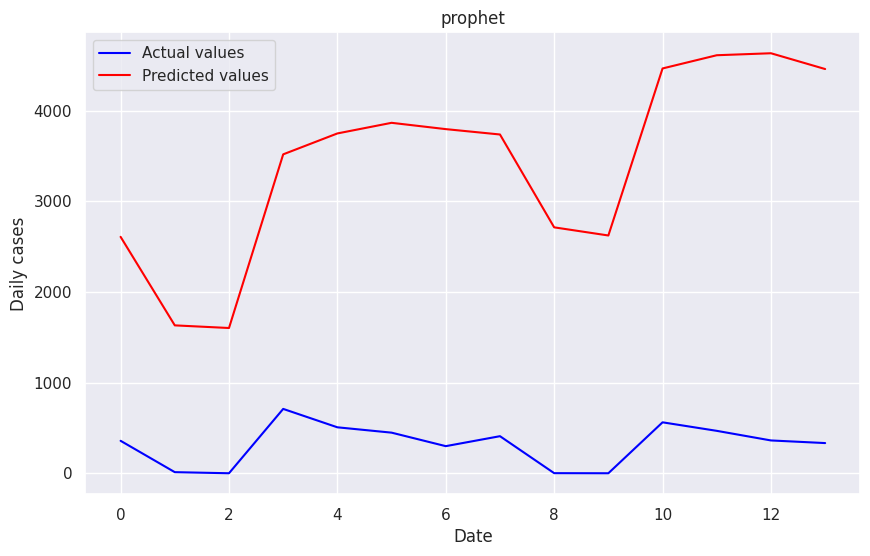

In [139]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(forecast['yhat'], color='red', label='Predicted values')
plt.title('prophet')
plt.xlabel('Date')
plt.ylabel('Daily cases')
plt.legend()
plt.show()

# LSTM


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [141]:
berlin_processed = berlin_df.iloc[:, 1:2].values

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
berlin_scaled = scaler.fit_transform(berlin_processed)

In [143]:
features_set = []
labels = []
for i in range(10, 289):
    features_set.append(berlin_scaled[i-10:i, 0])
    labels.append(berlin_scaled[i, 0])

In [144]:
features_set = np.array(features_set)

In [145]:
labels = np.array(labels)

In [146]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [147]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_8 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_9 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 50)            30200     
                                                                 
 dropout_10 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [148]:
model.fit(features_set, labels, epochs = 10, batch_size = 32)

Epoch 1/10
9/9 [==============================] - 9s 28ms/step - loss: 8.9396e-04
Epoch 2/10
9/9 [==============================] - 0s 31ms/step - loss: 5.0622e-04
Epoch 3/10
9/9 [==============================] - 0s 34ms/step - loss: 2.9357e-04
Epoch 4/10
9/9 [==============================] - 0s 28ms/step - loss: 3.3620e-04
Epoch 5/10
9/9 [==============================] - 0s 28ms/step - loss: 2.8680e-04
Epoch 6/10
9/9 [==============================] - 0s 33ms/step - loss: 3.0050e-04
Epoch 7/10
9/9 [==============================] - 0s 29ms/step - loss: 2.7393e-04
Epoch 8/10
9/9 [==============================] - 0s 30ms/step - loss: 2.8227e-04
Epoch 9/10
9/9 [==============================] - 0s 32ms/step - loss: 2.6545e-04
Epoch 10/10
9/9 [==============================] - 0s 31ms/step - loss: 2.5657e-04


In [149]:
l = len(berlin_scaled)
for i in range(20):
   test_features = []
   test_features.append(berlin_scaled[l-10:l, ])
   test_features = np.array(test_features)
   test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

  #predicting the new value
   predictions = model.predict(test_features)
   berlin_scaled = np.append(berlin_scaled, predictions[0,0])
   predictions = scaler.inverse_transform(predictions)
   new = int(round(predictions[0,0]))
   berlin_processed = np.append(berlin_processed, new)
   l += 1

len(berlin_processed)

1/1 [==============================] - 0s 25ms/step


1081

In [150]:
dataset = pd.DataFrame(berlin_processed)
dataset.columns = ['Daily cases']
pred = ["0"]*290 + ['1']*(len(berlin_processed)-290)
dataset['label'] = pred
dataset['time'] = [i for i in range(1,len(berlin_processed)+1)]

<ipython-input-151-2aeeead3af2e>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



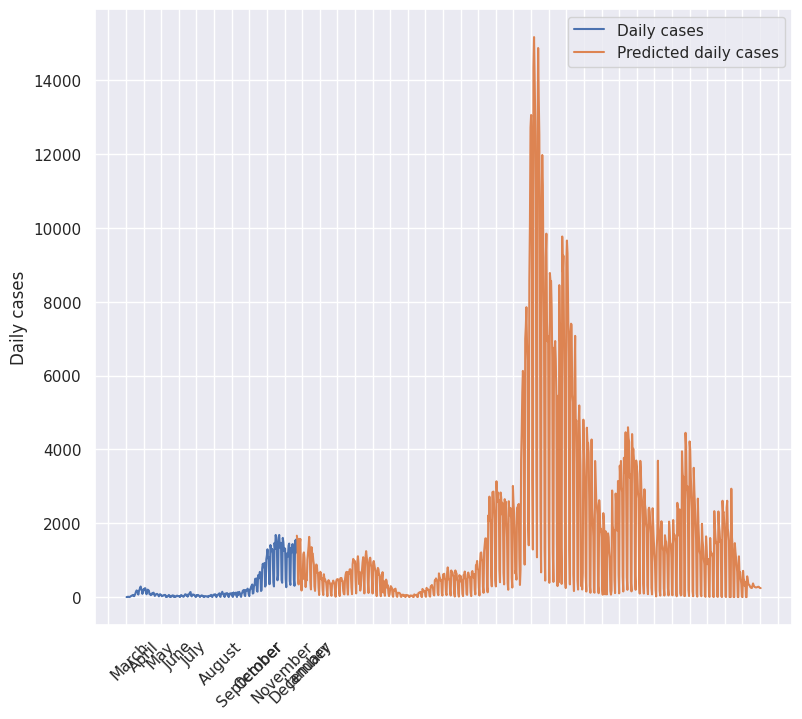

In [151]:
sns.set(rc={'figure.figsize':(9,8)})
ax = sns.lineplot(data=dataset, x="time", y = "Daily cases", hue = "label")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
x_dates = ["", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January"]
ax.set_xticklabels(labels=x_dates, rotation=45, ha='left')
ax.set(xlabel="")
legend = ax.legend()
legend.texts[0].set_text("Daily cases")
legend.texts[1].set_text("Predicted daily cases")

# Estimating only the last two weeks

In [152]:
berlin_processed = berlin_df[['y']].iloc[:-14]

In [153]:
len(berlin_processed)

1047

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
berlin_scaled = scaler.fit_transform(berlin_processed)

In [155]:
features_set = []
labels = []
for i in range(10, 276):
    features_set.append(berlin_scaled[i-10:i, 0])
    labels.append(berlin_scaled[i, 0])

In [156]:
features_set = np.array(features_set)
labels = np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [157]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 100)           40800     
                                                                 
 dropout_12 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_13 (LSTM)              (None, 10, 100)           80400     
                                                                 
 dropout_13 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 10, 50)            30200     
                                                                 
 dropout_14 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [158]:
model.fit(features_set, labels, epochs = 10, batch_size = 32)

Epoch 1/10
9/9 [==============================] - 9s 50ms/step - loss: 7.8691e-04
Epoch 2/10
9/9 [==============================] - 0s 29ms/step - loss: 5.5585e-04
Epoch 3/10
9/9 [==============================] - 0s 31ms/step - loss: 2.8172e-04
Epoch 4/10
9/9 [==============================] - 0s 27ms/step - loss: 2.3037e-04
Epoch 5/10
9/9 [==============================] - 0s 28ms/step - loss: 2.4185e-04
Epoch 6/10
9/9 [==============================] - 0s 27ms/step - loss: 2.4533e-04
Epoch 7/10
9/9 [==============================] - 0s 30ms/step - loss: 2.1074e-04
Epoch 8/10
9/9 [==============================] - 0s 27ms/step - loss: 2.1171e-04
Epoch 9/10
9/9 [==============================] - 0s 30ms/step - loss: 2.0602e-04
Epoch 10/10
9/9 [==============================] - 0s 35ms/step - loss: 2.1677e-04


In [159]:
testing_labels =  berlin_df[['y']][-14:].values

In [160]:
test_inputs = berlin_df[['y']][-14 - 10:].values

In [161]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [162]:
test_features = []
for i in range(10, 24):
    test_features.append(test_inputs[i-10:i, 0])

In [163]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [164]:
predictions = model.predict(test_features)

1/1 [==============================] - 2s 2s/step


In [165]:
predictions = scaler.inverse_transform(predictions)

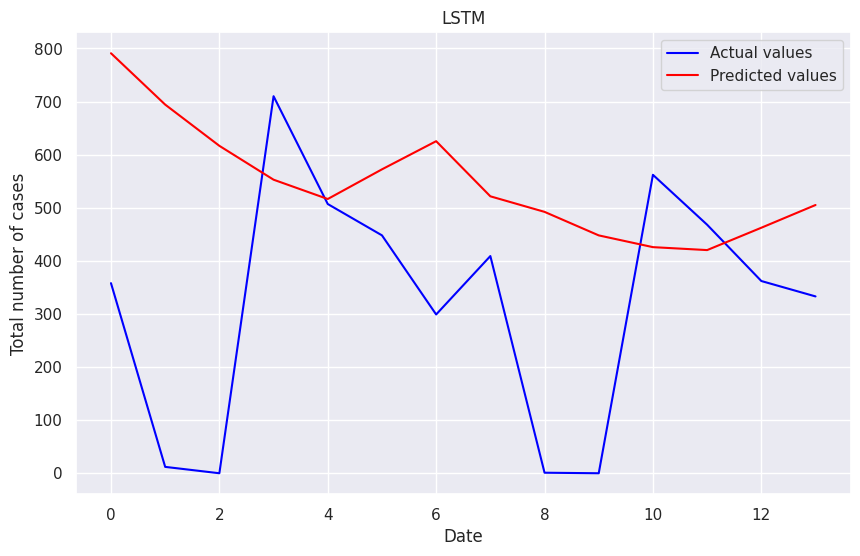

In [166]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(predictions , color='red', label='Predicted values')
plt.title('LSTM')
plt.xlabel('Date')
plt.ylabel('Total number of cases')
plt.legend()
plt.show()

In [167]:
len(testing_labels)

14